In [81]:
import pandas as pd
import numpy as np
import statistics

In [82]:
CSX = pd.read_csv("./data/CSX.csv",index_col=['Date'])
EPAM = pd.read_csv("./data/EPAM.csv",index_col=['Date'])
EQIX = pd.read_csv("./data/EQIX.csv",index_col=['Date'])
HLT = pd.read_csv("./data/HLT.csv",index_col=['Date'])
VZ = pd.read_csv("./data/VZ.csv",index_col=['Date'])

In [83]:
tickers = [CSX, EPAM, EQIX, HLT, VZ]

In [84]:
for i in tickers:
    print(i.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2017-11-13  16.656668  16.263332  16.453333  16.583332  14740800.0  15.776852
2017-11-14  16.540001  16.333332  16.486668  16.466667  13259100.0  15.665861
2017-11-15  16.446667  16.086666  16.420000  16.209999  15861300.0  15.421674
2017-11-16  16.716667  16.113333  16.236668  16.706667  21616800.0  15.894188
2017-11-17  16.690001  16.500000  16.653334  16.639999  18522300.0  15.830764
                  High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2017-11-13  102.510002  100.120003  101.889999  102.370003  274300  102.370003
2017-11-14  103.070000  101.510002  101.800003  102.610001  178200  102.610001
2017-11-15  103.389999  100.879997  102.709999  102.629997  246600  102.629997
2017-11-16  104.320000  103.160004  103.230003  103.610001 

In [85]:
for i in tickers:
    print(sum(i["Close"] != i["Adj Close"]))

889
0
882
574
1045


The prices are equal for EPAM stock. Therefore, there were no stock splits and dividends realized.

In [86]:
for i in tickers:
    print(i["Adj Close"].agg([max, min]))

max    37.799999
min    15.421674
Name: Adj Close, dtype: float64
max    717.489990
min     97.080002
Name: Adj Close, dtype: float64
max    882.830017
min    324.682831
Name: Adj Close, dtype: float64
max    163.139999
min     55.939999
Name: Adj Close, dtype: float64
max    58.360912
min    35.349998
Name: Adj Close, dtype: float64


In [87]:
for i in tickers:
    i["log_return"] = i["Adj Close"].apply(np.log).diff()
    print(i.head())

                 High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2017-11-13  16.656668  16.263332  16.453333  16.583332  14740800.0  15.776852   
2017-11-14  16.540001  16.333332  16.486668  16.466667  13259100.0  15.665861   
2017-11-15  16.446667  16.086666  16.420000  16.209999  15861300.0  15.421674   
2017-11-16  16.716667  16.113333  16.236668  16.706667  21616800.0  15.894188   
2017-11-17  16.690001  16.500000  16.653334  16.639999  18522300.0  15.830764   

            log_return  
Date                    
2017-11-13         NaN  
2017-11-14   -0.007060  
2017-11-15   -0.015710  
2017-11-16    0.030180  
2017-11-17   -0.003998  
                  High         Low        Open       Close  Volume  \
Date                                                                 
2017-11-13  102.510002  100.120003  101.889999  102.370003  274300   
2017-11-14  103.070000  101.510002  101.800003 

In [88]:
for i in tickers:
    print(i["log_return"].agg([max, min, np.mean, statistics.median]))

max       0.152290
min      -0.169017
mean      0.000561
median    0.000464
Name: log_return, dtype: float64
max       0.224636
min      -0.610210
mean      0.001000
median    0.002035
Name: log_return, dtype: float64
max       0.109769
min      -0.135417
mean      0.000303
median    0.000687
Name: log_return, dtype: float64
max       0.131474
min      -0.134347
mean      0.000539
median    0.000396
Name: log_return, dtype: float64
max       0.069607
min      -0.069727
mean      0.000025
median    0.000183
Name: log_return, dtype: float64


In [89]:
for i in tickers:
    print(i["log_return"].idxmax())

2020-03-24
2022-03-16
2020-03-24
2020-04-06
2020-03-26


In [90]:
for i in tickers:
    print(i["log_return"].idxmin())

2020-03-16
2022-02-28
2020-03-16
2020-03-18
2022-07-22


In [91]:
for i in tickers:
    print(i['Volume'].rolling(5).sum().mean())

74035636.41434263
2177259.123505976
2520865.577689243
13583367.80876494
86429830.83665338


In [92]:
for i in tickers:
    print(sum(i["log_return"].dropna()))

0.7053153789478439
1.2581490190728868
0.3809917175347364
0.6786688173777913
0.031276424183519946


highest total return - EPAM

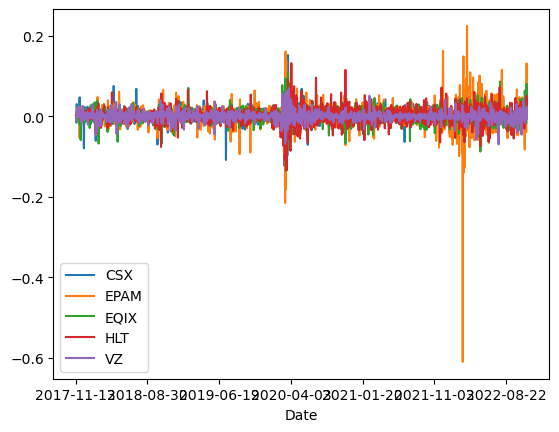

In [93]:
ax = CSX['log_return'].plot()

for i in tickers[1:5]:
    i['log_return'].plot(ax=ax)
    
ax.legend(["CSX", "EPAM", "EQIX", "HLT", "VZ"])

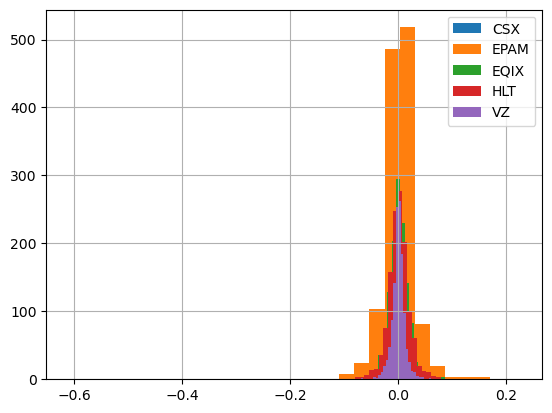

In [94]:
ax = CSX['log_return'].hist(bins=30)

for i in tickers[1:5]:
    i['log_return'].hist(ax=ax,bins=30)
    
ax.legend(["CSX", "EPAM", "EQIX", "HLT", "VZ"])